# Project Name: TMDB Movies' Data Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset we investigate here is about movies. The file is downloaded from TMDB and contains the following data columns:<br />
id<br />
imdb_id<br />
popularity<br />
budget<br />
revenue<br />
original_title<br />
cast<br />
homepage<br />
director<br />
tagline<br />
keywords<br />
overview<br />
runtime<br />
genres<br />
production_companies<br />
release_date<br />
vote_count<br />
vote_average<br />
release_year<br />
budget_adj<br />
revenue_adj<br />



### Question(s) for Analysis


From the description above it seems like we can answer some useful questions about this dataset such as:<br />
Which are the most produced genres?<br />
What is the change in the number of movies produced over years?<br />
Which movies has the highest budgets?<br />
Which movies has the lowest budgets?<br />
Which movies gained haighest profits?<br />
Which movies gained least profits?<br />
Who are the directors with biggest number of movies?<br />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
<br />

In [2]:
##loading data by reading csv file
movies_df = pd.read_csv('tmdb-movies.csv')
##viewing data head as a sample
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
##viewing the info of the table
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
##viewing the describtive statistics of the data
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### From the above descriptive statistics I think there is some limitations with the data as in:
The minimum value of budget and revenue seem to be wrong.<br />
The minimum of runtime also seem to be wrong.<br />
The vote count difference between maximum and minimum is so huge so that in my opinion we can not depend on it which  can be considired a limitiation.
<br />


### Data Cleaning
<br />
In this section I'll work on dataset to make it mor clean and usable by applying some hanges like:<br \>
Removing unnecessary columns.<br \>
Removing duplicates<br \>
Dealing with null values either by ignoring, replacing, or removing.

In [5]:
##remove unnecessary columns that may be a source of distraction
movies_df.drop(['release_date', 'budget_adj', 'revenue_adj', 'overview', 'cast', 'homepage', 'tagline', 'keywords', 'imdb_id'], axis = 1, inplace = True)

In [6]:
##removing duplicates
movies_df.drop_duplicates(inplace = True)

In [7]:
##Checking for null vales
movies_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [8]:
##getting final view after changes and see if there are more changes required
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


From my point of view this is a good final form as the differences between columns values are not so big and with every exploratory process later on every column will be checked again and further processes will take place if necessary.

<a id='eda'></a>
## Exploratory Data Analysis

<br />
<br />


### Research Question 1: Which are the most produced genres?
This question can be useful for having an idea about which genres is most popular which maybe useful for small producers or someone who wants to play it safe to choose which genre is least risky

In [9]:
##creating a function to sort a datafram and get the highest values
##the function takes 3 arguments x(the name of dataframe), y(the number of column to sort with or column name), and z(the number of results wanted)
def highest_values (x, y=0, z=5):
    highest = x.sort_values(by = y, ascending = False).head(z)
    return highest
##creating a function to sort a datafram and get the lowest values
##the function takes 3 arguments x(the name of dataframe), y(the number of column to sort with or column name), and z(the number of results wanted)
def lowest_values (x, y=0, z=5):
    lowest = x.sort_values(by = y, ascending = False).tail(z)
    return lowest

In [10]:
##creating a new dataframe of movies' genres
genres = movies_df['genres'].str.get_dummies(sep = '|')

In [11]:
genres = genres.sum().reset_index()

In [12]:
##viewing sample of the genres dataframe
genres.head()

,index,0
0,Action,2384
1,Adventure,1471
2,Animation,699
3,Comedy,3793
4,Crime,1354


Text(0.5,0,'Genre')

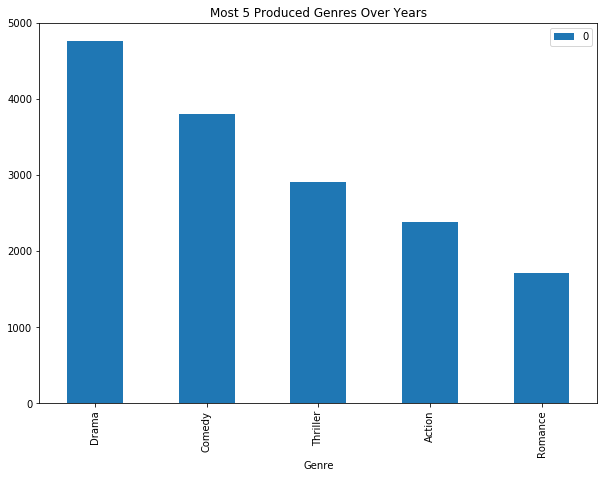

In [13]:
##sorting the genres dataframe and ploting 5 most produced genres
highest_values(genres).plot(kind = 'bar', figsize = (10, 7), x = 'index');
plt.title('Most 5 Produced Genres Over Years')
plt.xlabel('Genre')

In [14]:
##getting least produced genre
lowest_values(genres,0 ,1)

,index,0
19,Western,165


In [15]:
##getting most produced genre
highest_values(genres, 0, 1)

,index,0
6,Drama,4760


From this we can tell that based on this data the most five produced genres are: (Drama-Comedy-Thriller-Action-Romance). The most produced genre is "Drama" by 4760 Drama movies and the least produced genre is "Western" by only 165 movies.

### Research Question 2: What is the change in number of produced movies over years?
THis question visualizes the production number and growth and gives an insight about how big did this industry become

Text(0,0.5,'Number of Movies')

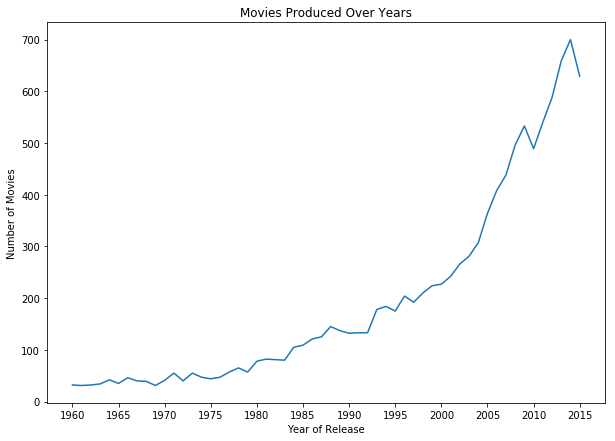

In [16]:
##creating datframe for production year and plotting number of movies against year of production
production = movies_df.groupby('release_year').count()['id']
production.plot(xticks = np.arange(1960,2016,5), yticks = np.arange(0, 800, 100), figsize = (10, 7));
plt.title('Movies Produced Over Years')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')

In [17]:
##getting the year with most number of movies produced
production.sort_values(ascending = False).head(1)

release_year
2014    700
Name: id, dtype: int64

In [18]:
##getting the year with least number of movies produced
production.sort_values(ascending = False).tail(1)

release_year
1961    31
Name: id, dtype: int64

From this we can tell that based on this data set generally the number of movies produced increases over years, with a minimum number of movies produced of 31 in 1969 and maximum number of movies produced of 700 in 2014

### Research Question 3: Which movies has the highest budgets? Which movies has the lowest budgets? Which movies gained haighest profits? Which movies gained least profits?
### Is Budget correlated with revenue?
This type of question is just to have an idea about the budgets and revenue of movies and their profits. while the second question is to know if budget correlated with the revenue(and the profit as a result of that) or not.

In [19]:
##creating new dataframe for movies financial stuff
movies_financial = movies_df.copy(deep = True)

In [20]:
##dropping all other unnecessary columns
movies_financial.drop(['id', 'popularity', 'director', 'runtime', 'genres', 'production_companies', 'vote_count', 'vote_average', 'release_year'], axis = 1, inplace = True)
movies_financial.head()

,budget,revenue,original_title
0,150000000,1513528810,Jurassic World
1,150000000,378436354,Mad Max: Fury Road
2,110000000,295238201,Insurgent
3,200000000,2068178225,Star Wars: The Force Awakens
4,190000000,1506249360,Furious 7


In [21]:
##removing "0" budget movies because they don't make sense
movies_financial['budget'].replace(0, np.nan, inplace = True)

In [22]:
movies_financial.dropna(inplace = True)
movies_financial.tail()

,budget,revenue,original_title
10835,12000000.0,20000000,The Sand Pebbles
10841,75000.0,0,The Shooting
10848,5115000.0,12000000,Fantastic Voyage
10855,700000.0,0,The Ghost & Mr. Chicken
10865,19000.0,0,Manos: The Hands of Fate


Text(0,0.5,'Budget')

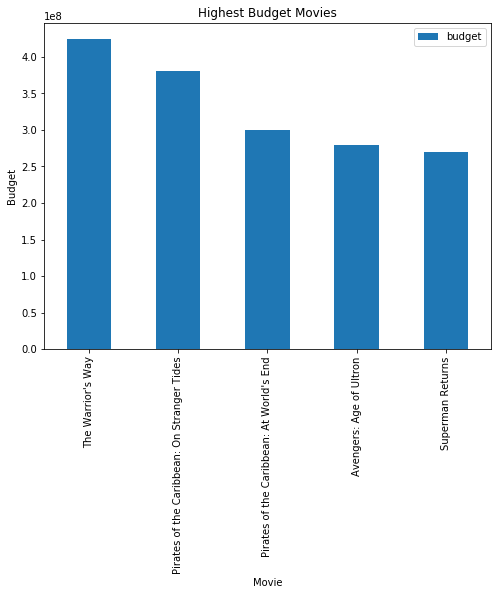

In [23]:
##plotting highest movies' budget
highest_values(movies_financial[['original_title', 'budget']], 'budget', 5).plot(kind = 'bar', figsize = (8,6), x = 'original_title');
plt.title('Highest Budget Movies')
plt.xlabel('Movie')
plt.ylabel('Budget')

In [24]:
##sorting the dataframe and getting least budget movies
movies_financial.sort_values(by = 'budget', ascending = False).tail()

,budget,revenue,original_title
8944,2.0,16,Death Wish 2
1151,1.0,0,Fear Clinic
2618,1.0,100,Lost & Found
3065,1.0,0,"Angus, Thongs and Perfect Snogging"
3581,1.0,1378,"Love, Wedding, Marriage"


Text(0,0.5,'Budget')

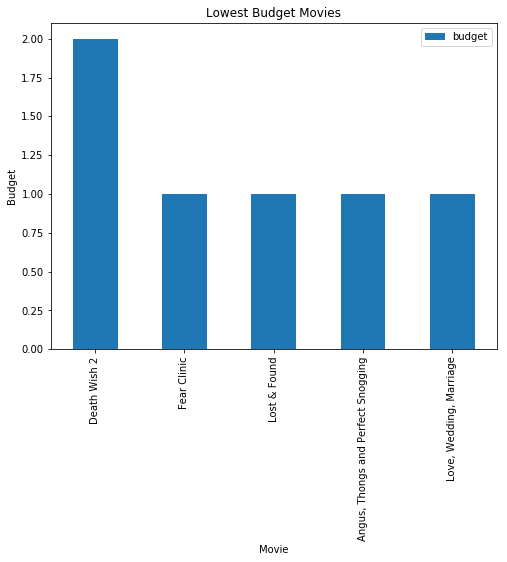

In [25]:
##plotting graph of lowest budget movies
lowest_values(movies_financial[['original_title', 'budget']], 'budget', 5).plot(kind = 'bar', figsize = (8,6), x = 'original_title');
plt.title('Lowest Budget Movies')
plt.xlabel('Movie')
plt.ylabel('Budget')

The movie with the highest budget is "The Warrior's Way" with  a budget of 425 million dollars, while the movie with the lowest budget is "Love, Wedding, Marriage" with a budget of 1 dollar(Which seems to be an outliar or wrong data in my point of view).

In [26]:
##adding profit column and getting highest prfitable movies
movies_financial['profit'] = movies_financial['revenue'] - movies_financial['budget']
highest_values(movies_financial, 'profit', 5)

,budget,revenue,original_title,profit
1386,237000000.0,2781505847,Avatar,2.544506e+09
3,200000000.0,2068178225,Star Wars: The Force Awakens,1.868178e+09
5231,200000000.0,1845034188,Titanic,1.645034e+09
0,150000000.0,1513528810,Jurassic World,1.363529e+09
4,190000000.0,1506249360,Furious 7,1.316249e+09


Text(0,0.5,'Profit')

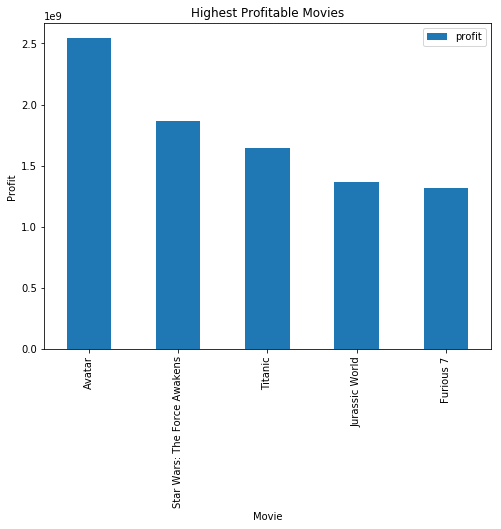

In [27]:
##plotting highest profitable movies
highest_values(movies_financial[['original_title', 'profit']], 'profit', 5).plot(kind = 'bar', figsize = (8,6), x = 'original_title');
plt.title('Highest Profitable Movies')
plt.xlabel('Movie')
plt.ylabel('Profit')

In [28]:
##getting least profitable movies
lowest_values(movies_financial, 'profit', 5)

,budget,revenue,original_title,profit
7031,145000000.0,25819961,The Alamo,-119180039.0
2214,120000000.0,0,The Pacific,-120000000.0
2069,150000000.0,0,The Wolfman,-150000000.0
5508,255000000.0,89289910,The Lone Ranger,-165710090.0
2244,425000000.0,11087569,The Warrior's Way,-413912431.0


Text(0,0.5,'Profit')

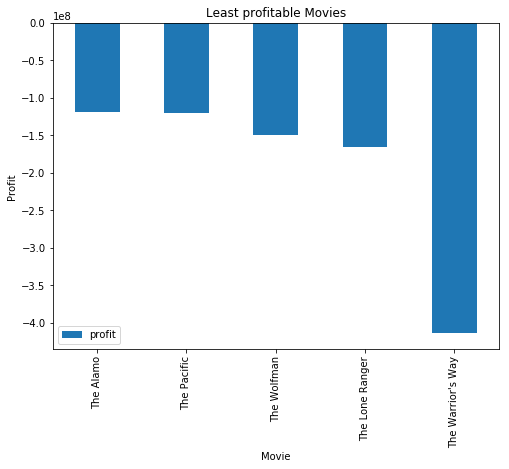

In [29]:
##plotting least profitable movies
lowest_values(movies_financial[['original_title', 'profit']], 'profit', 5).plot(kind = 'bar', figsize = (8,6), x = 'original_title');
plt.title('Least profitable Movies')
plt.xlabel('Movie')
plt.ylabel('Profit')

The movie with the highest profit was "Avatar" with around 2.5 billion dollars profit, while the movie with the least profit or biggest loss to be accurate is "The Warrior's Way" with a loss by over 400 million dollars.

the correlation between revenue and budget is:  0.700161727315


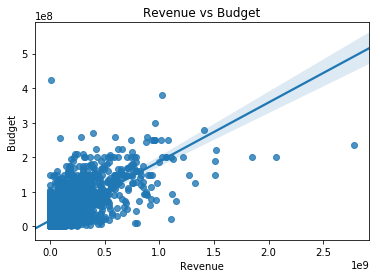

In [30]:
b_vs_r = sns.regplot(x = movies_financial['revenue'], y = movies_financial['budget']);
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid")
b_vs_r.set_title('Revenue vs Budget')
b_vs_r.set_xlabel('Revenue')
b_vs_r.set_ylabel('Budget')
print('the correlation between revenue and budget is: ', movies_financial.corr().loc['revenue', 'budget'])

The correlation between the budget and the revenue is 0.7 which is small and indicates that the budget of movie and its revenue are not correlated and this is also kind of obvious in the regression graph

### Research Question 4: Which are the most and least popular movies?
This question also gives an idea about the popularity of some movies and if the popularity is correlated with revenue

In [31]:
##creating new dataframe of movies' popularity and getting most popular movies
popularity = movies_df[['original_title', 'popularity']].copy(deep=True)
popularity.head()

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
2,Insurgent,13.112507
3,Star Wars: The Force Awakens,11.173104
4,Furious 7,9.335014


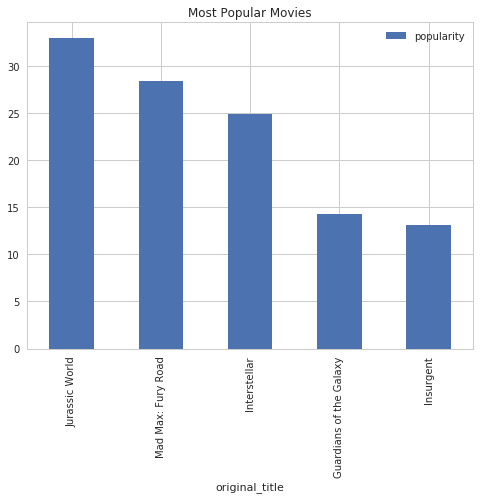

In [32]:
##plotting 5 most popular movies
popularity.sort_values(by = 'popularity', ascending = False).head().plot.bar(title = 'Most Popular Movies', figsize = (8,6), x = 'original_title');

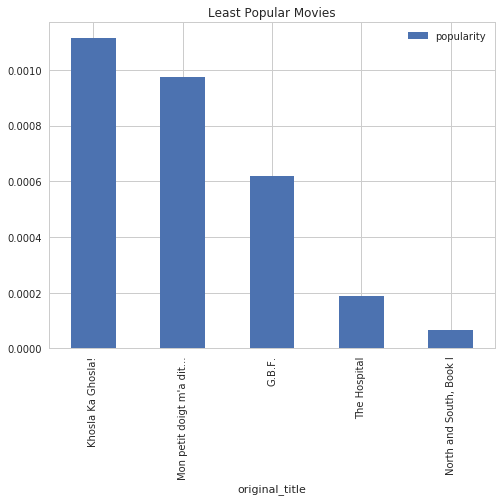

In [33]:
##plotting least popular movies
popularity.sort_values(by = 'popularity', ascending = False).tail().plot.bar(title = 'Least Popular Movies', figsize = (8,6), x = 'original_title');

In [34]:
##getting most popular movie ever
popularity.sort_values(by = 'popularity', ascending = False).head(1)

,original_title,popularity
0,Jurassic World,32.985763


In [35]:
##getting least popular movie ever
popularity.sort_values(by = 'popularity', ascending = False).tail(1)

,original_title,popularity
6181,"North and South, Book I",0.000065


<br />
The most popular movie is "Jurassic World", while the least popular movie is "North and South, Book I".
<br />


the correlation between revenue and popularity is:  0.663360281413


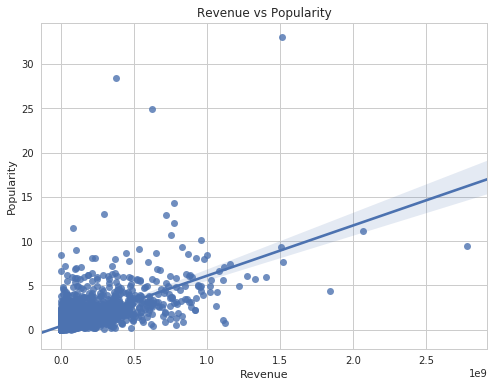

In [36]:
p_vs_r = sns.regplot(x = movies_df['revenue'], y = movies_df['popularity']);
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid")
p_vs_r.set_title('Revenue vs Popularity')
p_vs_r.set_xlabel('Revenue')
p_vs_r.set_ylabel('Popularity')
print('the correlation between revenue and popularity is: ', movies_df.corr().loc['revenue', 'popularity'])

The correlation between the popularity and the revenue is 0.6 which is small and indicates that the popularity of movie and its revenue are not correlated and this is also kind of obvious in the regression graph

### Research Question 5:  Who are the directors with biggest number of movies?
The importance of this question also influnces the production process as it gives an idea about the directors with highest number of movies directed which maybe means how good is that director and how many producers have trusted him which can give an idea for a producer about which director should he choose for his movie.

In [37]:
##creating new dataframe of directors
directors = movies_df.groupby('director').count()['id']

In [38]:
##getting directors with highst number of movies directed
directors.sort_values(ascending = False).head()

director
Woody Allen         45
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     29
Ridley Scott        23
Name: id, dtype: int64

<br />
The director who directed the biggest number of movies is "Woody Allen" who directed 45 movies followed by "Clint Eastwood" with a credit of 34 movies, then "Steven Spielberg" and "Martin Scorsese" both with a credit of 29 movies.

## Limitations

In [39]:
##getting movies with highest vote count
movies_df['vote_count'].sort_values(ascending = False).head()

1919    9767
4361    8903
1386    8458
2875    8432
4364    7375
Name: vote_count, dtype: int64

In [40]:
##getting movies with lowest vote counts
movies_df['vote_count'].sort_values(ascending = False).tail()

2583    10
8062    10
3281    10
3282    10
1702    10
Name: vote_count, dtype: int64

from my point of view the big gap between movies in vote count limiting the judgement on the vote average of each movie and makes this parameter and all the judgements based on it are not the most accurate.

<a id='conclusions'></a>
## Conclusions

With all this exploratory steps that have been done we can conclude that:<br />
The most five produced genres are: (Drama-Comedy-Thriller-Action-Romance)<br />
The most produced genre is "Drama" by 4760 Drama movies.<br />
The least produced genre is "Western" by only 165 movies.<br />
The number of movies produced increases over years.<br />
The minimum number of movies produced in a year was of 31 in 1969.<br />
The maximum number of movies produced in a year was 700 in 2014.<br />
The movie with the highest budget is "The Warrior's Way" with a budget of 425 million dollars.<br />
The movie with the lowest budget is "Love, Wedding, Marriage" with a budget of 1 dollar(which seems to be nonsense or maybe an error in the data collection process).
The movie with the highest profit was "Avatar" with around 2.5 billion dollars profit.<br />
The movie with the least profit or biggest loss to be accurate is "The Warrior's Way" with a loss by over 400 million dollars.<br />
There is no correlation between movie's budget and its revenue.<br />
The most popular movie is "Jurassic World".<br />
The least popular movie is "North and South, Book I".<br />
There is no correlation between movie's popularity and its revenue.<br />
The director who directed the biggest number of movies is "Woody Allen" who directed 45 movies followed by "Clint Eastwood" with a credit of 34 movies, then "Steven Spielberg" and "Martin Scorsese" both with a credit of 29 movies.<br />


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0